# Employee Turn Over

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PATH_DATA='../data/'

## Get The data

In [3]:
data_churn=pd.read_csv(PATH_DATA+'churn.csv')
data_comment=pd.read_csv(PATH_DATA+'commentInteractions.csv')
data_votes=pd.read_csv(PATH_DATA+'votes.csv')
data_comment_cln1=pd.read_csv(PATH_DATA+'comments_clean_anonimized.csv')

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
## Happy today?
data_votes.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2


In [5]:
data_votes['employee_company']=data_votes.employee.astype(str)+'_'+data_votes.companyAlias

In [6]:
len(data_votes.employee_company.unique())

4377

In [7]:
len(data_votes.companyAlias.unique())

37

In [8]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017


In [9]:
data_comment.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d


In [10]:
data_churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True


In [11]:
len(data_churn.employee.unique())

1002

In [12]:
data_churn.shape

(4847, 5)

* Jumlah Comment di dislike 
* Berapa kali Employee nge-vote
* Berapa kali Employee hit 4
* Kapan Terakhir vote (Recency)
* Berapa kali Employee nge-comment


### Jumlah Comment yang di dislike

In [13]:
data_comment_cln1['employee_company']=data_comment_cln1.employee.astype(
                str)+'_'+data_comment_cln1.companyAlias

data_comment_cln1['is_dislikes']=(data_comment_cln1.dislikes>0).astype(int)

In [14]:
data_comment_cln1.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,employee_company,is_dislikes
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,Mon Mar 20 19:00:17 CET 2017,307_56aec740f1ef260003e307d6,0
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,Mon Mar 20 18:55:16 CET 2017,382_56aec740f1ef260003e307d6,1
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,Mon Mar 20 16:44:02 CET 2017,172_56aec740f1ef260003e307d6,0
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,Mon Mar 20 16:06:08 CET 2017,135_56aec740f1ef260003e307d6,1
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,Mon Mar 20 14:30:50 CET 2017,225_56aec740f1ef260003e307d6,1


In [15]:
# data_comment_cln1.head()

In [16]:
data_dislikes=data_comment_cln1.groupby(['employee','companyAlias']).agg(
            {'is_dislikes':[np.mean,np.size]}).reset_index()

In [17]:
data_dislikes.columns=['employee','companyAlias','dislike_percent','dislike_cnt']

In [18]:
# data_dislikes.sort_values('dislike_percent',ascending=False)

### Berapa kali Employee nge-vote (Standardized)

In [19]:
vote_number=data_votes.groupby(['employee','companyAlias']).vote.size().reset_index()
vote_number.head()

,employee,companyAlias,vote
0,1,5474b9cde4b0bf7614b2c66f,2
1,1,54d43612e4b0f6a40755d93e,16
2,1,54e52607e4b01191dc064966,135
3,1,5641f96713664c000332c8cd,257
4,1,56558cfd07a5de00030908fb,2


In [20]:
vote_mean_std=vote_number.groupby('companyAlias').agg({'vote':[np.mean,np.std]}).reset_index()
vote_mean_std.columns=['companyAlias','vote_mean_c','vote_std_c']
vote_mean_std.head()

,companyAlias,vote_mean_c,vote_std_c
0,5370af43e4b0cff95558c12a,28.572727,45.074359
1,53a2dd43e4b01cc02f1e9011,32.500000,45.300087
2,5474b9cde4b0bf7614b2c66f,4.600000,6.535374
3,54d43612e4b0f6a40755d93e,23.263158,28.473852
4,54e52607e4b01191dc064966,88.250000,120.630214


In [21]:
vote_merge=pd.merge(vote_number,vote_mean_std,on='companyAlias',how='left')

In [22]:
vote_merge['vote_standar']=(vote_merge.vote-vote_merge.vote_mean_c)/vote_merge.vote_std_c

In [23]:
vote_merge.head()

,employee,companyAlias,vote,vote_mean_c,vote_std_c,vote_standar
0,1,5474b9cde4b0bf7614b2c66f,2,4.600000,6.535374,-0.397835
1,1,54d43612e4b0f6a40755d93e,16,23.263158,28.473852,-0.255082
2,1,54e52607e4b01191dc064966,135,88.250000,120.630214,0.387548
3,1,5641f96713664c000332c8cd,257,104.176471,90.879394,1.681608
4,1,56558cfd07a5de00030908fb,2,2.333333,1.723281,-0.193429


### Berapa kali Employee hit 4

In [24]:
data_votes['flag4']=(data_votes.vote==4).astype(int)
data_votes.head()

,employee,companyAlias,voteDate,vote,employee_company,flag4
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,31_56aec740f1ef260003e307d6,1
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,33_56aec740f1ef260003e307d6,1
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,79_56aec740f1ef260003e307d6,1
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,94_56aec740f1ef260003e307d6,1
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2,16_56aec740f1ef260003e307d6,0


In [25]:
data_hit4=data_votes.groupby(['employee','companyAlias']).agg(
            {'flag4':[np.mean,np.size]}).reset_index()
data_hit4.columns=['employee','companyAlias','hit4_percent','hit4_cnt']

In [26]:
data_hit4.head()

,employee,companyAlias,hit4_percent,hit4_cnt
0,1,5474b9cde4b0bf7614b2c66f,1.000000,2
1,1,54d43612e4b0f6a40755d93e,0.187500,16
2,1,54e52607e4b01191dc064966,0.007407,135
3,1,5641f96713664c000332c8cd,0.412451,257
4,1,56558cfd07a5de00030908fb,0.500000,2


### Kapan Terakhir vote (Recency)

In [27]:
data_votes.head()

,employee,companyAlias,voteDate,vote,employee_company,flag4
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,31_56aec740f1ef260003e307d6,1
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,33_56aec740f1ef260003e307d6,1
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,79_56aec740f1ef260003e307d6,1
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,94_56aec740f1ef260003e307d6,1
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2,16_56aec740f1ef260003e307d6,0


In [28]:
# data_churn.head()

In [29]:
overall_last_date=pd.to_datetime(data_churn.lastParticipationDate).max()
overall_last_date

/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/Users/alamhanz/anaconda/envs/py36/lib/python3.6/site-packages/dateutil/parser/_parser.py:1204: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Timestamp('2017-03-20 21:25:54')

In [30]:
delta_data=pd.to_datetime(data_votes.voteDate)-overall_last_date

In [31]:
data_votes['range_day']=delta_data.apply(lambda x : -1*x.days)

In [32]:
data_votes.head()

,employee,companyAlias,voteDate,vote,employee_company,flag4,range_day
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,31_56aec740f1ef260003e307d6,1,414
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,33_56aec740f1ef260003e307d6,1,414
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,79_56aec740f1ef260003e307d6,1,414
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4,94_56aec740f1ef260003e307d6,1,414
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2,16_56aec740f1ef260003e307d6,0,414


In [33]:
data_recency=data_votes.groupby(['employee','companyAlias']).range_day.min().reset_index()

In [34]:
data_recency.head()

,employee,companyAlias,range_day
0,1,5474b9cde4b0bf7614b2c66f,846
1,1,54d43612e4b0f6a40755d93e,286
2,1,54e52607e4b01191dc064966,173
3,1,5641f96713664c000332c8cd,2
4,1,56558cfd07a5de00030908fb,478


In [35]:
recency_mean_std=data_recency.groupby('companyAlias').agg({'range_day':[np.mean,np.std]}).reset_index()
recency_mean_std.columns=['companyAlias','recency_mean_c','recency_std_c']
recency_mean_std.head()

,companyAlias,recency_mean_c,recency_std_c
0,5370af43e4b0cff95558c12a,119.922727,174.337699
1,53a2dd43e4b01cc02f1e9011,245.763889,88.086336
2,5474b9cde4b0bf7614b2c66f,832.900000,23.544049
3,54d43612e4b0f6a40755d93e,218.578947,214.277680
4,54e52607e4b01191dc064966,202.083916,231.371128


In [36]:
recency_merge=pd.merge(data_recency,recency_mean_std,on='companyAlias',how='left')
recency_merge['recency_standar']=(recency_merge.range_day-recency_merge.recency_mean_c)/recency_merge.recency_std_c

In [37]:
recency_merge.head()

,employee,companyAlias,range_day,recency_mean_c,recency_std_c,recency_standar
0,1,5474b9cde4b0bf7614b2c66f,846,832.900000,23.544049,0.556404
1,1,54d43612e4b0f6a40755d93e,286,218.578947,214.277680,0.314643
2,1,54e52607e4b01191dc064966,173,202.083916,231.371128,-0.125702
3,1,5641f96713664c000332c8cd,2,67.606335,82.635914,-0.793920
4,1,56558cfd07a5de00030908fb,478,303.916667,60.088508,2.897115


### Merge Features

In [38]:
data_churn['label']=data_churn.stillExists.astype(int)
data_churn['ids']=data_churn['employee'].astype(str)+'_'+data_churn['companyAlias']

In [39]:
data_label=data_churn[['ids','companyAlias','employee','label']]
data_label.head()

,ids,companyAlias,employee,label
0,512_56aec740f1ef260003e307d6,56aec740f1ef260003e307d6,512,1
1,-2_56aec740f1ef260003e307d6,56aec740f1ef260003e307d6,-2,0
2,2_56aec740f1ef260003e307d6,56aec740f1ef260003e307d6,2,1
3,487_56aec740f1ef260003e307d6,56aec740f1ef260003e307d6,487,0
4,3_56aec740f1ef260003e307d6,56aec740f1ef260003e307d6,3,1


In [40]:
for dd in [data_dislikes,vote_merge,data_hit4,recency_merge]:
    dd['ids']=dd['employee'].astype(str)+'_'+dd['companyAlias']

In [41]:
for dd in [data_dislikes,vote_merge,data_hit4,recency_merge]:
    use_cols=list(set(dd.columns)-set(['employee','companyAlias']))
    data_label=pd.merge(data_label,dd[use_cols],on='ids',how='left')

In [42]:
data_label1=data_label[['ids','companyAlias','employee','dislike_cnt','dislike_percent','vote','hit4_cnt','hit4_percent','label']].fillna(0)
data_label2=data_label[['ids','companyAlias','employee','range_day']].fillna(-1)

In [43]:
# standardized vote and recency
# pd.merge(vote_number,vote_mean_std,on='companyAlias',how='left')
# recency_merge=pd.merge(data_recency,recency_mean_std,on='companyAlias',how='left')

In [44]:
data_label1_merge=pd.merge(data_label1,vote_mean_std,on='companyAlias',how='left')
data_label1_merge['vote_standar']=(data_label1_merge.vote-data_label1_merge.vote_mean_c)/data_label1_merge.vote_std_c

data_label2_merge=pd.merge(data_label2,recency_mean_std,on='companyAlias',how='left')
data_label2_merge['recency_standar']=(data_label2_merge.range_day-data_label2_merge.recency_mean_c)/data_label2_merge.recency_std_c

In [45]:
data_all_train=data_label1_merge[['ids','dislike_cnt','dislike_percent','vote','hit4_cnt','hit4_percent','vote_standar','label']]
data_all_train=pd.merge(data_all_train,data_label2_merge[['ids','range_day','recency_standar']],on='ids',how='left')

In [46]:
data_all_train.head()

,ids,dislike_cnt,dislike_percent,vote,hit4_cnt,hit4_percent,vote_standar,label,range_day,recency_standar
0,512_56aec740f1ef260003e307d6,4.0,0.500000,4.0,4.0,0.250000,-0.890913,1,26.0,-0.443662
1,-2_56aec740f1ef260003e307d6,0.0,0.000000,0.0,0.0,0.000000,-0.940104,0,-1.0,-0.705699
2,2_56aec740f1ef260003e307d6,28.0,0.857143,72.0,72.0,0.125000,-0.054672,1,4.0,-0.657174
3,487_56aec740f1ef260003e307d6,1.0,0.000000,14.0,14.0,0.214286,-0.767937,0,99.0,0.264811
4,487_56aec740f1ef260003e307d6,1.0,0.000000,14.0,14.0,0.214286,-0.767937,0,99.0,0.264811


## Data Splitting

In [47]:
data_all_train.label.mean()

0.7435845625378864

In [48]:
len(data_all_train)*0.7

3464.2999999999997

In [49]:
data_train=data_all_train.sample(3464,random_state=123)
data_test=data_all_train[~(data_all_train.ids.isin(data_train.ids.tolist()))]

## Modelling

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [51]:
Xtrain=data_train[['dislike_cnt','dislike_percent','vote','hit4_cnt','hit4_percent','vote_standar','range_day','recency_standar']]
ytrain=data_train['label']

Xtest=data_test[['dislike_cnt','dislike_percent','vote','hit4_cnt','hit4_percent','vote_standar','range_day','recency_standar']]
ytest=data_test['label']

In [52]:
model1=DecisionTreeClassifier(max_depth=7)

In [53]:
model1.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Model Evalution

In [54]:
accuracy_score(ytrain,model1.predict(Xtrain))

0.9050230946882217

In [55]:
accuracy_score(ytest,model1.predict(Xtest))

0.8962395543175488

In [56]:
# Xtrain

In [57]:
joblib.dump(model1,'DecisionTree1.joblib')

['DecisionTree1.joblib']

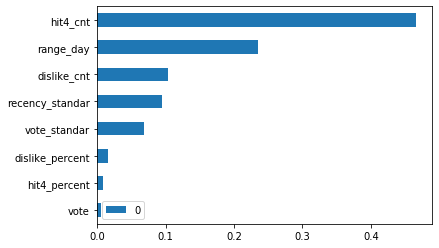

In [58]:
pd.DataFrame(model1.feature_importances_,
             index=['dislike_cnt','dislike_percent','vote','hit4_cnt','hit4_percent','vote_standar',
                    'range_day','recency_standar']).sort_values(0).plot(kind='barh')

## Bias and Variance Trade-off Example

In [69]:
acc_train=[]
acc_test=[]
for md in [i+2 for i in range(30)]:
    model0=DecisionTreeClassifier(max_depth=md)
    model0.fit(Xtrain,ytrain)
    acc_train.append(accuracy_score(ytrain,model0.predict(Xtrain)))
    acc_test.append(accuracy_score(ytest,model0.predict(Xtest)))
data_bv=pd.DataFrame({'accuracy train':acc_train,'accuracy test':acc_test},
                     index=[i+2 for i in range(30)])

In [70]:
# data_bv['accuracy test']

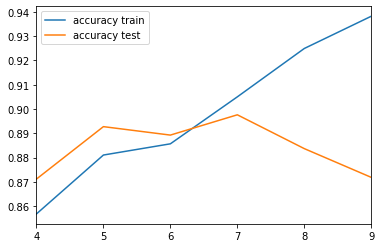

In [74]:
data_bv[2:8].plot()

In [ ]:
DecisionTreeClassifier()

## Grid Method

In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {'max_depth':[5,6,7,8], 'min_samples_split':[5,6], 
              'min_samples_leaf':[3,4,5]}

In [81]:
baseModel=DecisionTreeClassifier()
clf = GridSearchCV(baseModel, parameters, cv=3)

In [82]:
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 6, 7, 8], 'min_samples_split': [5, 6], 'min_samples_leaf': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
clf.best_score_

0.8816397228637414

## Bagging and Boosting

In [114]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [109]:
modelBase=DecisionTreeClassifier(max_depth=7)
# modelBase.fit(Xtrain,ytrain)

In [193]:
Bag_Model=BaggingClassifier(base_estimator=modelBase, n_estimators=10, 
                            random_state=346)

Bag_Model2=BaggingClassifier(base_estimator=Bag_Model, n_estimators=10, 
                            random_state=346)

Boost_Model=AdaBoostClassifier(base_estimator=modelBase, n_estimators=3, 
                               learning_rate=0.07, random_state=346)

In [194]:
Bag_Model2.fit(Xtrain,ytrain)
Boost_Model.fit(Xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.07, n_estimators=3, random_state=346)

In [195]:
accuracy_score(ytrain,Bag_Model2.predict(Xtrain))

0.9113741339491916

In [196]:
accuracy_score(ytrain,Boost_Model.predict(Xtrain))

0.9344688221709007

In [197]:
accuracy_score(ytest,Bag_Model2.predict(Xtest))

0.9122562674094707

In [198]:
accuracy_score(ytest,Boost_Model.predict(Xtest))

0.9045961002785515

In [199]:
# Boost_Model=AdaBoostClassifier(base_estimator=modelBase, n_estimators=3, 
#                                learning_rate=0.07, random_state=346)

acc_train=[]
acc_test=[]
ne_ls=[]
lr_ls=[]
for ne in [5,8,12,20]:
    for lr in [0.01,0.05,0.1,0.2,0.5]:
        Boost_Model=AdaBoostClassifier(base_estimator=modelBase, 
                                       n_estimators=ne, 
                               learning_rate=lr, random_state=346)
        Boost_Model.fit(Xtrain,ytrain)
        acc_train.append(accuracy_score(ytrain,Boost_Model.predict(Xtrain)))
        acc_test.append(accuracy_score(ytest,Boost_Model.predict(Xtest)))
        ne_ls.append(ne)
        lr_ls.append(lr)
        
data_bv2=pd.DataFrame({'accuracy train':acc_train,
                      'accuracy test':acc_test,
                      'n estimator': ne_ls,
                      'learning Rate': lr_ls})

In [209]:
# sns.heatmap(pd.pivot(data_bv2,columns='learning Rate',
#          index='n estimator',values='accuracy test'),annot=True)

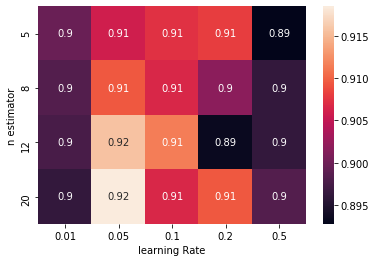

In [211]:
sns.heatmap(data_bv2.groupby(['n estimator',
        'learning Rate'])['accuracy test'].mean().unstack(),annot=True)